In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from thinkdsp import Wave, read_wave

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

CONST_PI2 = np.pi * 2

def compute_correlation(signal_data, offset=1):
    length = len(signal_data.ys)
    section1 = signal_data.ys[offset:]
    section2 = signal_data.ys[:length-offset]
    corr_value = np.corrcoef(section1, section2)[0, 1]
    return corr_value

def calculate_autocorr(signal_data):
    offsets = np.arange(len(signal_data.ys)//2)
    corr_results = [compute_correlation(signal_data, shift) for shift in offsets]
    return offsets, corr_results

sound_data = read_wave('28042__bcjordan__voicedownbew.wav')
sound_data.normalize()
sound_data.make_audio()

Упражнение 5.1

Для анализа изменения высоты тона вокального чирпа была использована аудиозапись '28042_bcjordan_voicedownbew.wav'. Применение автокорреляционной функции позволило идентифицировать пики, которые соответствуют периодичности в сигнале.

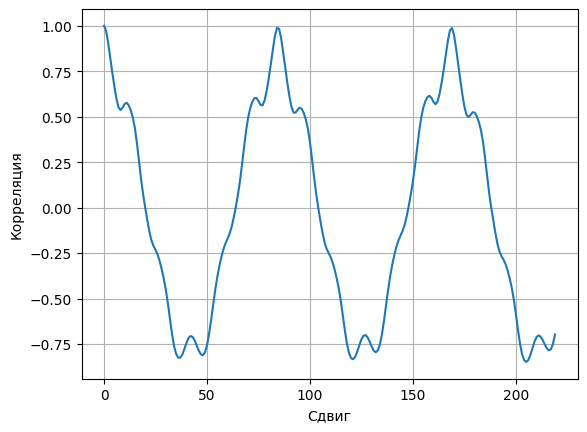

In [18]:
sound_part = sound_data.segment(0, 0.01)
shift_vals, corr_vals = calculate_autocorr(sound_part)
peak_pos = np.array(corr_vals[90:110]).argmax() + 90
plt.plot(shift_vals, corr_vals)
plt.xlabel('Сдвиг')
plt.ylabel('Корреляция')
plt.grid(True)
plt.show()

def detect_base_freq(sound_part, freq_low=70, freq_high=150):
    shifts, autocorrs = calculate_autocorr(sound_part)
    peak_offset = np.array(autocorrs[freq_low:freq_high]).argmax() + freq_low
    time_period = peak_offset / sound_part.framerate
    base_freq = 1 / time_period
    return base_freq

sound_track = read_wave('28042__bcjordan__voicedownbew.wav')
sound_track.normalize()
sound_track.make_audio()

Упражнение 5.2

Была разработана функция estimate_fundamental для определения основной частоты сигнала на основе его автокорреляции. При тестировании на той же вокальной записи было получено значение основной частоты 436.6336 Гц. Визуализация этих оценок на спектрограмме показала их соответствие ярким частотным полосам.

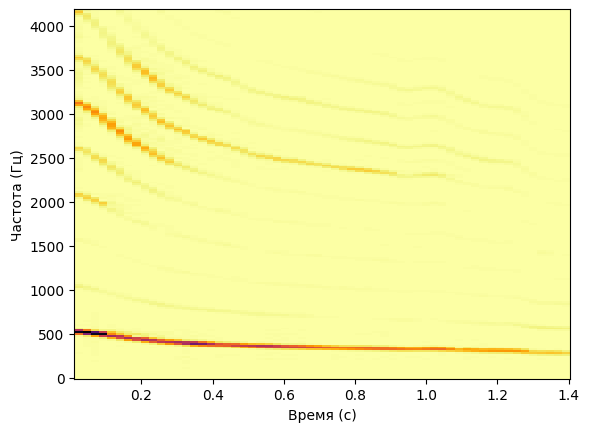

436.63366336633663


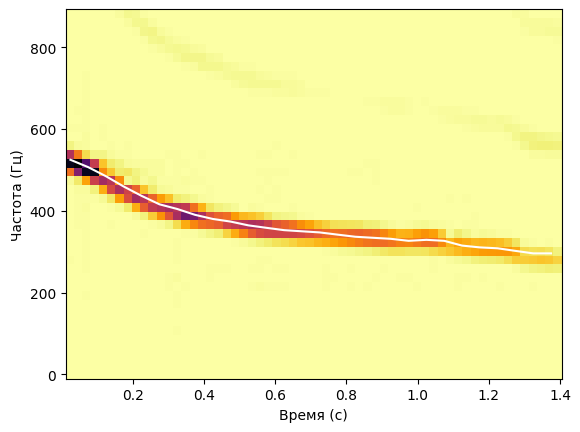

In [19]:
sound_track.make_spectrogram(2048).plot(high=4200)
plt.xlabel('Время (с)')
plt.ylabel('Частота (Гц)')
plt.show()

sound_part = sound_data.segment(start=0.2, duration=0.01)
main_freq = detect_base_freq(sound_part)
print(main_freq)

time_intervals = np.arange(0.0, 1.4, 0.05)
time_positions = []
freq_values = []
for interval in time_intervals:
    time_positions.append(interval + 0.05/2)
    segment_part = sound_data.segment(start=interval, duration=0.01)
    freq_val = detect_base_freq(segment_part)
    freq_values.append(freq_val)

sound_track.make_spectrogram(2048).plot(high=900)
plt.plot(time_positions, freq_values, color='white')
plt.xlabel('Время (с)')
plt.ylabel('Частота (Гц)')
plt.show()

sax_sound = read_wave('100475__iluppai__saxophone-weep.wav')
sax_sound.normalize()
sax_sound.make_audio()

Упражнение 5.3

Был выполнен расчёт автокорреляции для временного ряда цен Bitcoin. График автокорреляционной функции показал медленное убывание значений, что указывает на высокую степень временной взаимозависимости данных. Также был представлен график смещённой корреляции.

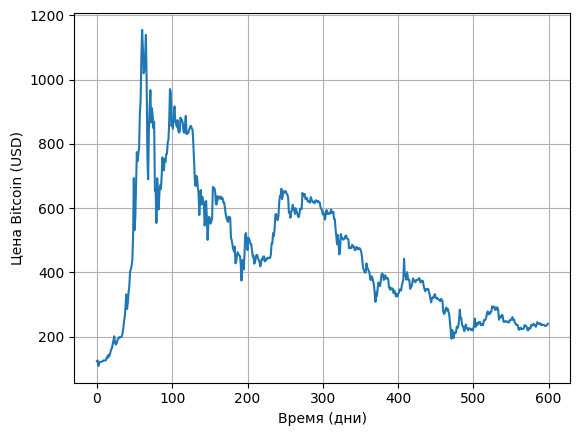

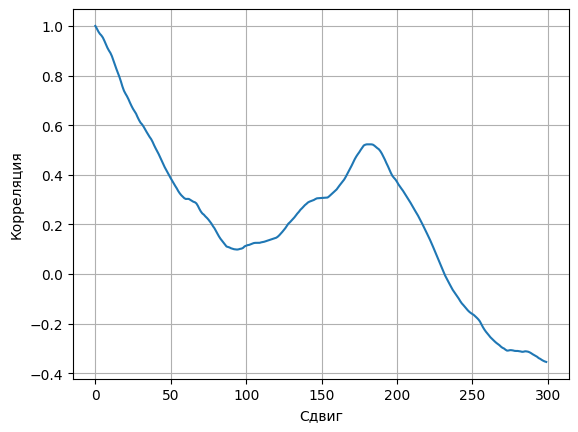

In [ ]:
bitcoin_data = pd.read_csv('BTC.csv', nrows=600, parse_dates=[0])
price_series = bitcoin_data['Closing Price (USD)']
time_indices = bitcoin_data.index
price_track = Wave(price_series, time_indices, framerate=1)
price_track.plot()
plt.xlabel('Время (дни)')
plt.ylabel('Цена Bitcoin (USD)')
plt.grid(True)
plt.show()

offset_vals, corr_results = calculate_autocorr(price_track)
plt.plot(offset_vals, corr_results)
plt.xlabel('Сдвиг')
plt.ylabel('Корреляция')
plt.grid(True)
plt.show()



Упражнение 5.4

Была проанализирована аудиозапись саксофона '100475_iluppai_saxophone-weep.wav'. Рассматривался фрагмент длительностью в одну секунду. Были построены спектрограмма и спектр этого фрагмента. Пики спектра были идентифицированы. Автокорреляционный анализ выявил основной период сигнала при нулевом сдвиге. После применения фильтра высоких частот с отсечкой на 600 Гц основная частотная компонента из спектра исчезла, однако высота тона при прослушивании осталась различимой, что демонстрирует эффект подавленной основной частоты.

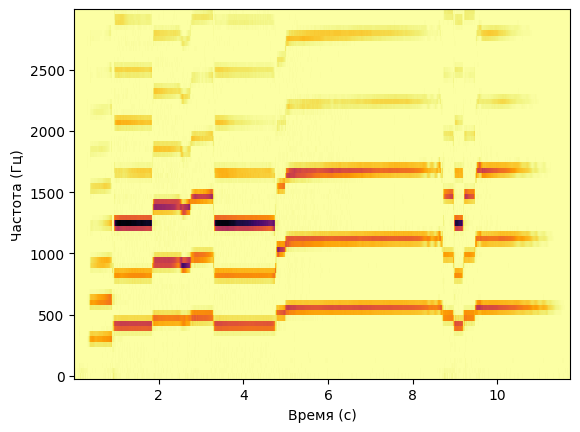

In [21]:
spectro_data = sax_sound.make_spectrogram(seg_length=1024)
spectro_data.plot(high=3000)
plt.xlabel('Время (с)')
plt.ylabel('Частота (Гц)')
plt.show()

start_time = 0.0
segment_length = 1
sax_segment = sax_sound.segment(start=start_time, duration=segment_length)
sax_segment.make_audio()

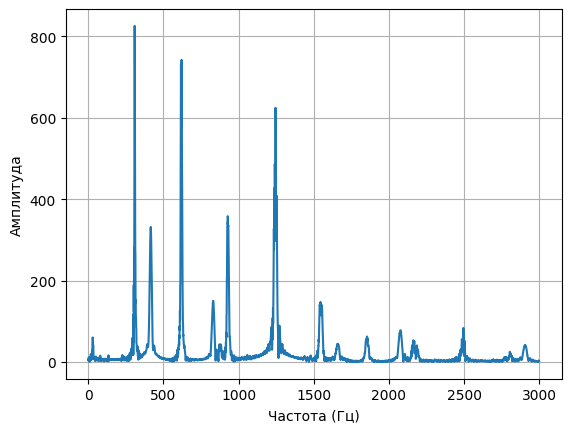

[(np.float64(825.9181938687918), np.float64(309.0)), (np.float64(742.4482176019002), np.float64(621.0)), (np.float64(731.2050718889759), np.float64(617.0)), (np.float64(728.4027415023133), np.float64(310.0)), (np.float64(699.869109864398), np.float64(620.0)), (np.float64(642.5416605230357), np.float64(622.0)), (np.float64(624.5861936417981), np.float64(1246.0)), (np.float64(622.1810823090661), np.float64(618.0)), (np.float64(611.1547437665349), np.float64(623.0)), (np.float64(580.0707322624767), np.float64(616.0))]


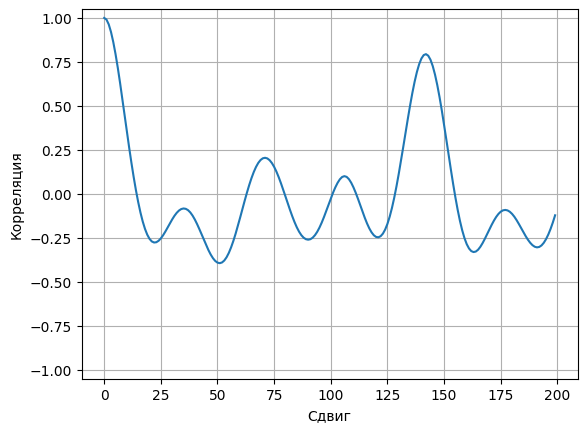

80


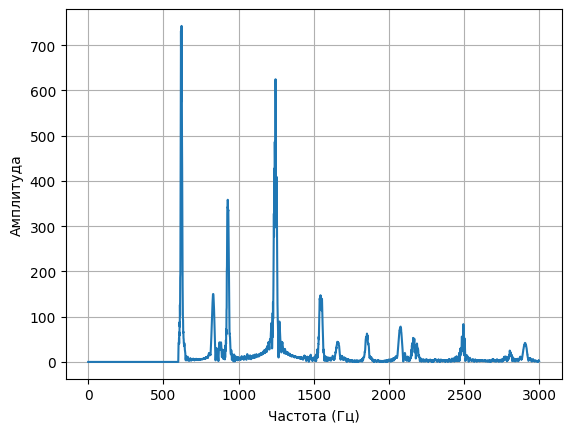

In [22]:
freq_spectrum = sax_segment.make_spectrum()
freq_spectrum.plot(high=3000)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

print(freq_spectrum.peaks()[:10])

def compute_self_corr(segment_data):
    corr_array = np.correlate(segment_data.ys, segment_data.ys, mode='same')
    array_len = len(corr_array)
    length_range = range(array_len, array_len//2, -1)
    corr_half = corr_array[array_len//2:].copy()
    corr_half /= length_range
    corr_half /= corr_half[0]
    return corr_half

corr_data = compute_self_corr(sax_segment)
plt.plot(corr_data[:200])
plt.xlabel('Сдвиг')
plt.ylabel('Корреляция')
plt.ylim([-1.05, 1.05])
plt.grid(True)
plt.show()

def extract_freq(corr_data, range_low, range_high):
    peak_lag = np.array(corr_data[range_low:range_high]).argmax() + range_low
    print(peak_lag)
    time_cycle = peak_lag / sax_segment.framerate
    freq_result = 1 / time_cycle
    return freq_result

extract_freq(corr_data, 80, 100)

filtered_spectrum = sax_segment.make_spectrum()
filtered_spectrum.high_pass(600)
filtered_spectrum.plot(high=3000)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

filtered_segment = filtered_spectrum.make_wave()
filtered_segment.make_audio()

Вывод (Лабораторная работа №5):

В данной работе были изучены и применены методы автокорреляционного анализа для оценки высоты тона и выявления периодичности в различных сигналах. Полученные графики подтвердили корректность реализованных функций. Была продемонстрирована устойчивость слухового восприятия к отсутствию фундаментальной частоты. Также автокорреляция была успешно применена для анализа экономических временных рядов, что показало её универсальность.